In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/train.csv (1).zip')
test = pd.read_csv('/test.csv.zip')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(28000, 784)

In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [ ]:
x_train = df.drop(['label'],axis=1)
y_train = df['label']

In [ ]:
y_train.value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

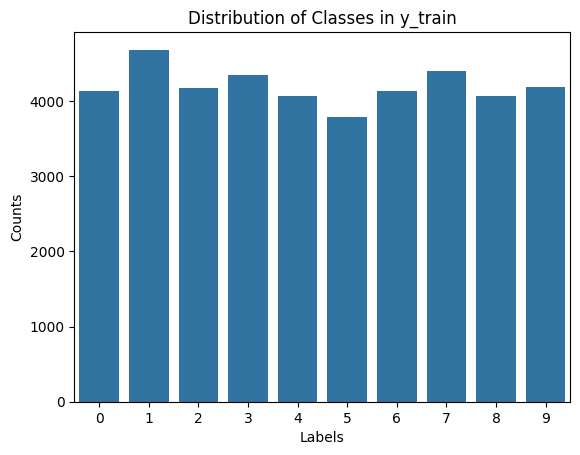

In [ ]:
sns.countplot(x=y_train)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Classes in y_train')
plt.show()

In [ ]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


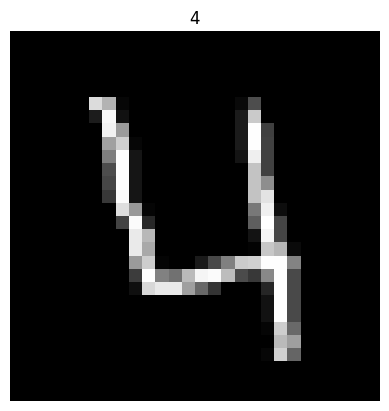

In [ ]:
img = x_train.iloc[3].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(df.iloc[3, 0])
plt.axis('off')
plt.show()


In [ ]:
#Normalization, Reshape and Label Encoding

In [ ]:
#Normalization
x_train = x_train / 255.0
test = test/255.0

In [ ]:
# Reshape
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
print('x_train:',x_train.shape)
print('test:',test.shape)

x_train: (42000, 28, 28, 1)
test: (28000, 28, 28, 1)


In [ ]:
# Label Encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)

In [ ]:
# split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [ ]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [ ]:
# Convolutional Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters = 8,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters = 16,kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))


cnn.add(Flatten())
cnn.add(Dense(256,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer = Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

history = cnn.fit(x_train,y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test),callbacks=[early_stopping_callback])

Epoch 1/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.7871 - loss: 0.6738 - val_accuracy: 0.9738 - val_loss: 0.0948
Epoch 2/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9574 - loss: 0.1385 - val_accuracy: 0.9771 - val_loss: 0.0669
Epoch 3/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9702 - loss: 0.0957 - val_accuracy: 0.9838 - val_loss: 0.0521
Epoch 4/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9755 - loss: 0.0780 - val_accuracy: 0.9864 - val_loss: 0.0472
Epoch 5/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9794 - loss: 0.0658 - val_accuracy: 0.9843 - val_loss: 0.0469
Epoch 6/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9773 - loss: 0.0685 - val_accuracy: 0.9857 - val_loss: 0.0453
Epoch 7/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.9818 - loss: 0.0589 - val_accuracy: 0.9864 - val_loss: 0.0415
Epoch 8/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9845 - loss: 0.0512 - 

In [ ]:
y_pred = cnn.predict(x_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
import numpy as np
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test_labels,y_pred_labels)

In [ ]:
accuracy_score

0.9897619047619047

In [ ]:
y_pred2 = cnn.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [ ]:
y_pred2

array([[8.4719004e-10, 2.7854798e-09, 9.9999923e-01, ..., 2.0220223e-07,
        3.2348515e-07, 1.0503207e-09],
       [9.9996048e-01, 9.9877795e-10, 4.3098782e-07, ..., 6.9762457e-08,
        5.7952627e-07, 4.5332675e-07],
       [5.1957044e-10, 2.6082500e-08, 1.3774687e-05, ..., 5.8901728e-06,
        3.7499052e-05, 9.9974120e-01],
       ...,
       [1.3272264e-17, 9.0224737e-11, 1.2598371e-10, ..., 1.0689004e-09,
        5.4456370e-11, 8.6287852e-11],
       [3.8113296e-07, 5.6124868e-08, 1.5471529e-07, ..., 4.3651651e-04,
        7.8550221e-07, 9.9916822e-01],
       [3.5642017e-11, 4.4764512e-10, 9.9999911e-01, ..., 1.4141105e-09,
        8.6737521e-07, 7.0355013e-11]], dtype=float32)

In [ ]:
y_test_labels2 = np.argmax(y_pred2, axis=1)

In [ ]:
y_test_labels2

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
# test_ids = range(len(test))

In [ ]:
test_ids=range(1,28001)

In [ ]:
import pandas as pd
submission = pd.DataFrame({
    'ImageId': test_ids,  # Replace with the IDs of the test samples
    'Label': y_test_labels2  # Replace with the predicted labels
})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
# Score: 0.98864

In [ ]:
d=pd.read_csv('/content/submission.csv')

In [ ]:
d

,ImageId,Prediction
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


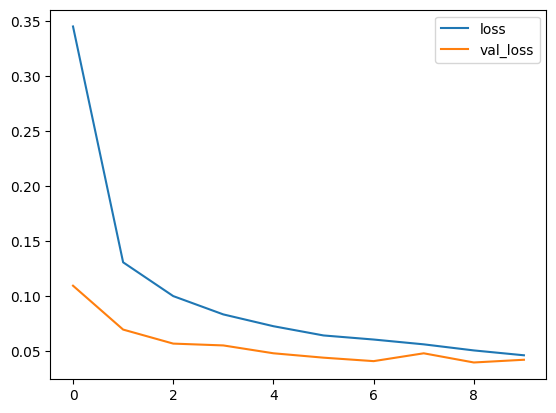

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

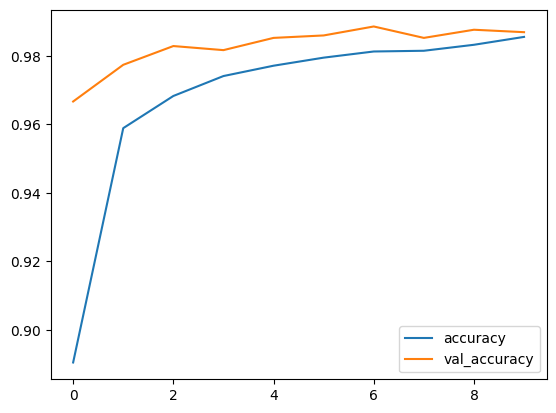

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [ ]:
# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.2
)


In [ ]:
History = cnn.fit(datagen.flow(x_train, y_train, batch_size=50),
          validation_data=(x_test, y_test),
          epochs=10,
          callbacks=[early_stopping_callback])

Epoch 1/10
  1/756 ━━━━━━━━━━━━━━━━━━━━ 15:05 1s/step - accuracy: 0.3400 - loss: 4.5063

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


756/756 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6495 - loss: 1.1611 - val_accuracy: 0.9643 - val_loss: 0.1262
Epoch 2/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8387 - loss: 0.4994 - val_accuracy: 0.9650 - val_loss: 0.1161
Epoch 3/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8704 - loss: 0.4049 - val_accuracy: 0.9702 - val_loss: 0.0948
Epoch 4/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.8882 - loss: 0.3665 - val_accuracy: 0.9740 - val_loss: 0.0882
Epoch 5/10
756/756 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8953 - loss: 0.3431 - val_accuracy: 0.9710 - val_loss: 0.0920
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
y_pred1 = cnn.predict(x_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
import numpy as np
y_test_labels1 = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
y_pred_labels1 = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score1 = accuracy_score(y_test_labels1,y_pred_labels1)

In [ ]:
accuracy_score1

0.9876190476190476